# 네이버 금융에서 환율 정보 활용하기
http://info.finance.naver.com/marketindex/

#  BeautifulSoup를 이용하여 html 데이터 가져오기
당일 환율 정보 가져오기

In [181]:
from bs4 import BeautifulSoup
import urllib.request as req

In [182]:
#HTML 가져오기
url = "http://info.finance.naver.com/marketindex/"
res = req.urlopen(url)

In [183]:
#HTML 분석하기
soup = BeautifulSoup(res, "html.parser")
print(soup)


<script language="javascript" src="http://finance.naver.com/template/head_js.nhn?referer=info.finance.naver.com&amp;menu=marketindex&amp;submenu=market"></script>
<script src="/js/jindo.min.ns.1.5.3.euckr.js" type="text/javascript"></script>
<script src="/js/jindo.1.5.3.element-text-patch.js" type="text/javascript"></script>
<div id="container" style="padding-bottom:0px;">
<script language="JavaScript" src="/js/flashObject.js?20180502015110"></script>
<div class="market_include">
<div class="market_data">
<div class="market1">
<div class="title">
<h2 class="h_market1"><span>환전 고시 환율</span></h2>
</div>
<!-- data -->
<div class="data">
<ul class="data_lst" id="exchangeList">
<li class="on">
<a class="head usd" href="/marketindex/exchangeDetail.nhn?marketindexCd=FX_USDKRW" onclick="clickcr(this, 'fr1.usdt', '', '', event);">
<h3 class="h_lst"><span class="blind">미국 USD</span></h3>
<div class="head_info point_up">
<span class="value">1,084.40</span>
<span class="txt_krw"><span class="blin

In [184]:
#원하는 데이터 추출하기
price = soup.select_one("div.head_info > span.value").string
time = soup.select_one("div.graph_info > span.time").string
print("time =", time)
print("usd/krw =", price)

time = 2018.05.21 12:52
usd/krw = 1,084.40


# 1. 최근일 환율정보 가져오기

In [185]:
#HTML 가져오기
url = "http://finance.naver.com/marketindex/exchangeDailyQuote.nhn?marketindexCd=FX_USDKRW"
res = req.urlopen(url)

In [186]:
#HTML 분석하기
soup = BeautifulSoup(res, "html.parser")
print(soup)


<html lang="ko">
<head>
<title>네이버 금융</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<link href="http://finance.naver.com/css/finance.css?20180508105107" rel="stylesheet" type="text/css"/>
<script language="javascript">document.domain="naver.com";</script>
<script src="/js/info/jindo.min.ns.1.5.3.euckr.js" type="text/javascript"></script>
<script src="http://finance.naver.com/js/lcslog.js?20180508105107" type="text/javascript"></script>
</head>
<body>
<div class="section_exchange section_today">
<h3 class="h_today"><span>일별 환율</span></h3>
<table border="1" class="tbl_exchange today" summary="일별 환율 리스트">
<caption>일별 환율</caption>
<colgroup>
<col width="78"/>
<col width="78"/>
<col width="73"/>
<col width="76"/>
<col width="76"/>
<col width="76"/>
<col width="78"/>
<col width="85"/>
</colgroup>
<thead>
<tr>
<th class="th_today1" rowsp

In [187]:
date_list = soup.select("td.date")
price_list = soup.select("td.num")
#print("date =", date_list)
#print("price =", price_list)

date = [<td class="date">2018.05.21</td>, <td class="date">2018.05.18</td>, <td class="date">2018.05.17</td>, <td class="date">2018.05.16</td>, <td class="date">2018.05.15</td>, <td class="date">2018.05.14</td>, <td class="date">2018.05.11</td>, <td class="date">2018.05.10</td>, <td class="date">2018.05.09</td>, <td class="date">2018.05.08</td>]
price = [<td class="num">1,084.40</td>, <td class="num"><img alt="상승" height="6" src="http://static.naver.com/nfinance/ico_up.gif" width="7"/> 2.40</td>, <td class="num">1,082.00</td>, <td class="num"><img alt="상승" height="6" src="http://static.naver.com/nfinance/ico_up.gif" width="7"/> 1.00</td>, <td class="num">1,081.00</td>, <td class="num"><img alt="하락" height="6" src="http://static.naver.com/nfinance/ico_down.gif" width="7"/>  0.50</td>, <td class="num">1,081.50</td>, <td class="num"><img alt="상승" height="6" src="http://static.naver.com/nfinance/ico_up.gif" width="7"/> 4.50</td>, <td class="num">1,077.00</td>, <td class="num"><img alt="상승"

In [188]:
col_date = []
for a in date_list:
    date = a.string
    print("-",date)
    col_date.append(date)

- 2018.05.21
- 2018.05.18
- 2018.05.17
- 2018.05.16
- 2018.05.15
- 2018.05.14
- 2018.05.11
- 2018.05.10
- 2018.05.09
- 2018.05.08


In [189]:
col_price = []
for p in price_list:
    price = p.string
    if p.string != None :
        print("-",price)
        col_price.append(price.replace(',',''))

- 1,084.40
- 1,082.00
- 1,081.00
- 1,081.50
- 1,077.00
- 1,069.50
- 1,067.00
- 1,072.00
- 1,079.00
- 1,079.00


# 2. 데이터프레임으로 데이터 생성하기

In [190]:
import pandas as pd

In [203]:
data_frame = pd.DataFrame({'date':col_date, 'price':col_price})

In [204]:
print(data_frame.head(3))
print(data_frame.dtypes)
data_frame['date'] = data_frame['date'].astype(str)
data_frame['price'] = data_frame['price'].apply(pd.to_numeric, errors='coerce')
print(data_frame.dtypes)
print(data_frame.head(3))

         date    price
0  2018.05.21  1084.40
1  2018.05.18  1082.00
2  2018.05.17  1081.00
date     object
price    object
dtype: object
date      object
price    float64
dtype: object
         date   price
0  2018.05.21  1084.4
1  2018.05.18  1082.0
2  2018.05.17  1081.0


# 3. 시각화 하기(일자별 환율 Trand 보기)

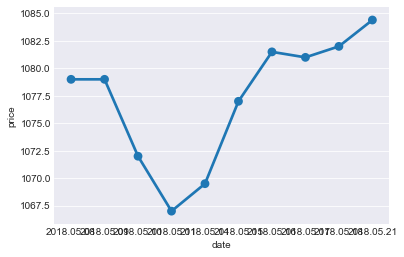

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
#ax = sns.pointplot(x="date", y="price", data=data_frame)
ax = sns.pointplot(x="date", y="price", data=data_frame.sort_values(by=['date']))
plt.show()

# 4. 데이터 저장(sqlite)

In [194]:
import sqlite3

In [210]:
con = sqlite3.connect('Suppliers.db')
c = con.cursor()
create_table = """CREATE TABLE IF NOT EXISTS exrate_us
				(date VARCHAR2(100), 
				price FLOAT);"""
c.execute(create_table)
con.commit()
data_frame.to_sql('exrate_us', con, flavor='sqlite', schema=None, if_exists='replace', 
                 index=True, index_label=None, chunksize=None, dtype=None)
con.close()


/anaconda/lib/python3.6/site-packages/pandas/io/sql.py:531: FutureWarning: the 'flavor' parameter is deprecated and will be removed in a future version, as 'sqlite' is the only supported option when SQLAlchemy is not installed.
  _validate_flavor_parameter(flavor)


In [207]:
con = sqlite3.connect('Suppliers.db')
c = con.cursor()
exrate_us = pd.read_sql_query("select * from exrate_us ;", con)
print(exrate_us.dtypes)
print(exrate_us)
con.close()

index      int64
date      object
price    float64
dtype: object
   index        date   price
0      0  2018.05.21  1084.4
1      1  2018.05.18  1082.0
2      2  2018.05.17  1081.0
3      3  2018.05.16  1081.5
4      4  2018.05.15  1077.0
5      5  2018.05.14  1069.5
6      6  2018.05.11  1067.0
7      7  2018.05.10  1072.0
8      8  2018.05.09  1079.0
9      9  2018.05.08  1079.0
